<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-con-R/blob/main/ejemplo_de_juguete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Ejemplos de juguete

Autor: Biología de Sistemas UNAM

Fecha: febrero 2021

Mostras ejemplo de depredador presa, dímero/crecimiento logístico/"muerte".

# Ejemplo 1: Crecimiento exponencial 

## 1. Describir el proceso  

Se quiere modelar el crecimiento de un microorganismo en su etapa de crecimiento exponencial. En esta etapa se supone que el crecimiento del microorganismo es proporcional a la cantidad de este que se encuentra presente. Suponemos que la tasa de crecimiento es constante. Bajo estas condiciones la velocidad de crecimiento se puede representar de la siguiente manera:

$$
v_{crec}(t) = k x(t) \tag{1}
$$

Donde $k$ es la tasa de crecimento constante (1/h), y $x$ es la concentración del microorganismo (g/L) al tiempo $t$

En el presente análisis se considera que no hay otra fuente de microorganismos diferente al crecimiento de los mismos. Tampoco se considera una muerte o consumo del microorganismo por parte de otra especie.  

## 2. Red para decribir el proceso 



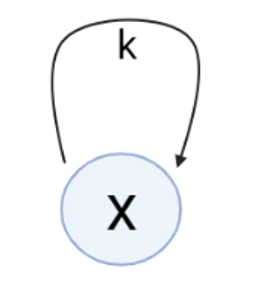

Fig 1. Red del proceso del ejemplo 1. Se aprecia que se considera una sola variable, $x$, en el análisis. Existe un efecto positivo de $x$ sobre sí misma debido al crecimiento de los microorganismo a una tasa constante $k$

## 3 . Establecer modelo 

Para el plantamiento del modelo se puede partir de una balance de biomasa de la siguiente manera

$$
\text{cambio de biomasa en el proceso} = \text{entrada de biomasa} - \text{salida de biomasa} + \text{generación de biomasa} - \text{consumo de biomasa}\\
$$


Dado que no hay entrada, salida, o consumo de biomasa se tiene 

$$
\text{cambio de biomasa en el proceso} = \text{generación de biomasa} 
$$


El cambio de biomasa con respecto del tiempo se escribe mediante una ED, y usamos (1) para representar la generación de biomasa

$$
\frac{dx(t)}{dt} = kx(t) = f(x) \tag{2}
$$



Tabla 1. Parámetros del model del ejemplo 1 

| parámetro | valor |
|:---:|:---:|
|   k (1/h) | 0.5    |

El valor del parámetro $k$ en la Tabla 1 ha sido propuesto solo para mostrar el ejemplo 

## 4. Análisis de estabilidad 

Para obtener el punto de equilibrio igualamos (2) a 0 y resolvemos para $x$

$$
\frac{dx(t)}{dt} = kx(t) = 0 \rightarrow x_{ss} = 0
$$

Se obtuvo el punto de equilibrio trivial $x_{ss} = 0$

Para determinar la estabilidad de este punto de equilibrio se pueden emplear varios razonamientos 

1. Calculo de eigenvalor 

Para una ecuación diferencial como (2) el eigenvalor se obtiene como:

$$
\lambda = \frac{df(x)}{dx} = \frac{d(kx)}{dx} = k \tag{3}
$$

De esta manera se tiene que el eigenvalor de (2) es $k$. Si este parámetro es positivo (tasa de crecimiento positiva), el eigenvalor es positivo y el punto de equilibrio es inestable. Si k es negativo, entonces el eigenvalor es negativo y el punto de equilibrio es estable

2. Graficar $dx/dt$ vs $x$

In [1]:
# establecer valor de parámetro
k = 0.5 # 1/h

In [2]:
# cambio de x en t 
dxdt <- function(x) {

    f = k*x

    return(f)
}

In [3]:
# valores de x a evaluar (deben ser biológicamente factibles)
x <- seq(0,10,0.1) # g/L
# evalur dx/dt
f <- dxdt(x) # g/(hL)

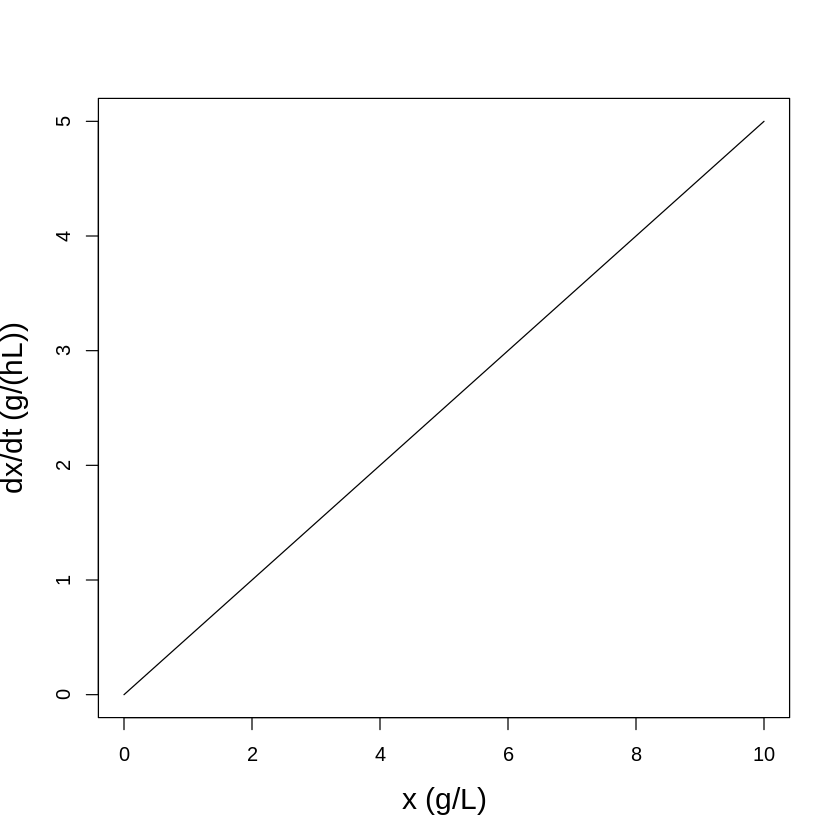

In [4]:
# mostrar gráfica 
plot(x,f, xlab = "x (g/L)", ylab = "dx/dt (g/(hL))", type = "l", cex.lab = 1.5)

Fig 2. Gráfica de $dx/dt$ vs $x$. Se observa que para cualquier valor de $x$ su cambio, $dx/dt$, siempre es positivo. Por esta razón se concluye que para cualquier valor de $x$ distinto de 0, el crecimiento exponencial hará que el sistema se aleje de 0. 

Dado que $k$ es positivo se puede concluir tanto del eigenvalor como de la Fig.2 que el punto de equilibrio $x_{ss}$ es inestable

## 5. Análisis dinámico (integración numérica)

### Breve explicación del método de euler

Se tiene la función 

$$
y(x) =  x^2 \tag{4}
$$

el valor de la función en $x_0 = 1$ es:

$$
y(x_0) = 1^2 = 1
$$

la derivada de (4) es:

$$
\frac{dy}{dt} = \dot{y}(x) =  2x \tag{5}
$$

y su valor en $x_0 = 1$ es: 

$$
\dot{y}(x_0) = 2 \times 1 = 2\
$$

por lo tanto tenemos que la ecuación de la recta tangente a (4) en $x_0$ es: 

$$
y_t(x) = y(x_0)  + m(x - x_0)  = 1 + 2(x - 1) \
$$


$$
y_t(x) = -1 + 2x \tag{6}\
$$

Donde $m$ es la pendiente (derivada) de (4) en $x_0$

Las funciones (4) y (6) se muestran en la Fig. 3

In [5]:
# función (4)
y_x <- function(x) {
    y = x^2
    return(y)
}

# función (5)
dydx <- function(x0) {
    dy <- 2*x0
    return(dy)
}

# función (6)
yt_x <- function(x0, x) {
    y = -1 + dydx(x0)*x
    return(y)
}

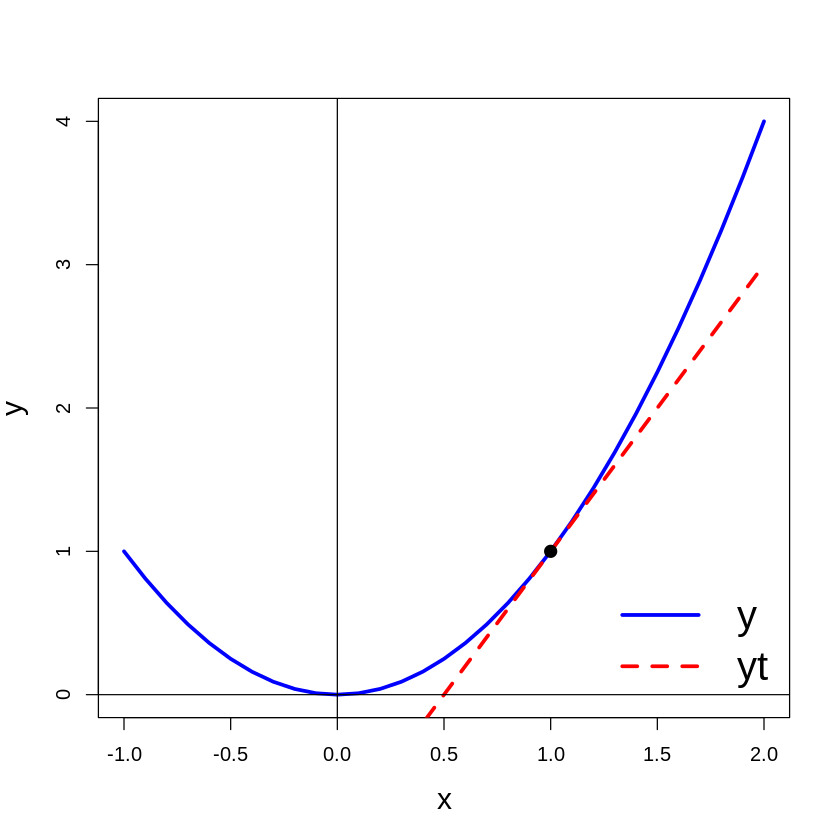

In [18]:
# valores de x a evaluar
x <- seq(-1,2,0.1)

# mostrar funciones
plot(x, y_x(x), type = "l", col = "blue", lwd = 3, xlab = "x", ylab = "y", cex.lab = 1.5)
lines(x, yt_x(1,x), col = "red", lty = 2, lwd = 3)
points(1,1, cex = 2, pch = 20)
abline(h = 0, v = 0)
legend("bottomright", legend = c("y", "yt"), bty = "n", lty = c(1,2), lwd = 3,col = c("blue", "red"), cex = 2)

Figura 3. Grafica de $y$ vs $x$ y $y_t$ vs $x$. Nota como ambas funciones tienen valores similares de $y$ alrededor de $x_0 = 1$. 

En la Fig. 3 se observa que ambas funciones tienen valores similares alrededor de $x_0 = 1$. Por lo tanto, una buena aproximación de (4) cerca de $x_0$ es (6). Es decir 

$$
y \approx y_t = 2x - 1
$$

Si usamos (6) como una aproximación de (4) podemos conocer el valor de un cambio en $y$, en (4), a partir de un cambio en $x$, cerca de $x_0$, de la siguiente manera

$$
\Delta y = m \Delta x, \text{válido para una recta}
$$

o si despejamos $y_2$

$$
y_2 = y_1 + m(x_2 - x_1) \tag{7}
$$

por lo tanto si conocemos los valores $x_0$, $x_1$, y $y_0$, podemos obtener $y_1$ a partir de (7)

La ecuación (7) se puede generalizar para cualquier par de valores consecutivos $x_t$ y $x_{t+1}$ como 

$$
y_{t+1} = y_t + \frac{dy(x_t)}{dt}(x_{t+1} - x_t) 
$$

si se establece el tamaño de paso como

$$
h = x_{t+1} - x_t \tag{8}
$$

se tiene 

$$
y_{t+1} = y_t + \frac{dy(x_t)}{dt}h \tag{9}
$$

Evaluando (9) de forma iterativa se logra obtener una buena aproximación de (4) partiendo de una condicion inicial $x_0$

Nota: Hay que tener presente que (9) es válida para la función de una recta. Cuando la función que evaluamos no es una recta, como (4), hemos visto que si se evalua en un valor inicial $x_0$ y se hacen iteraciones consecutivas usando (9) para un tamaño de paso relativamente pequeño, entonces se obtiene una buena aproximación. Esto se puede apreciar en la Fig. 3 

In [7]:
# cargar librerías para resolver EDOs
install.packages("deSolve")
library(deSolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# establecer modelo 
crecimiento <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        # balance de biomasa
        dxdt = k*x

        return(list(c(dxdt)))
    })
}

In [9]:
# establecer parámetros 
p <- c(k = 0.5)
# condiciones iniciales
x0 <- c(x = 0.1)
# tiempo de integración
time <- seq(0,10,0.1) # h = 0.1 tamaño de paso

In [10]:
# resolver ED
out <- ode(func = crecimiento, y = x0, times = time, parms = p, method = "euler")

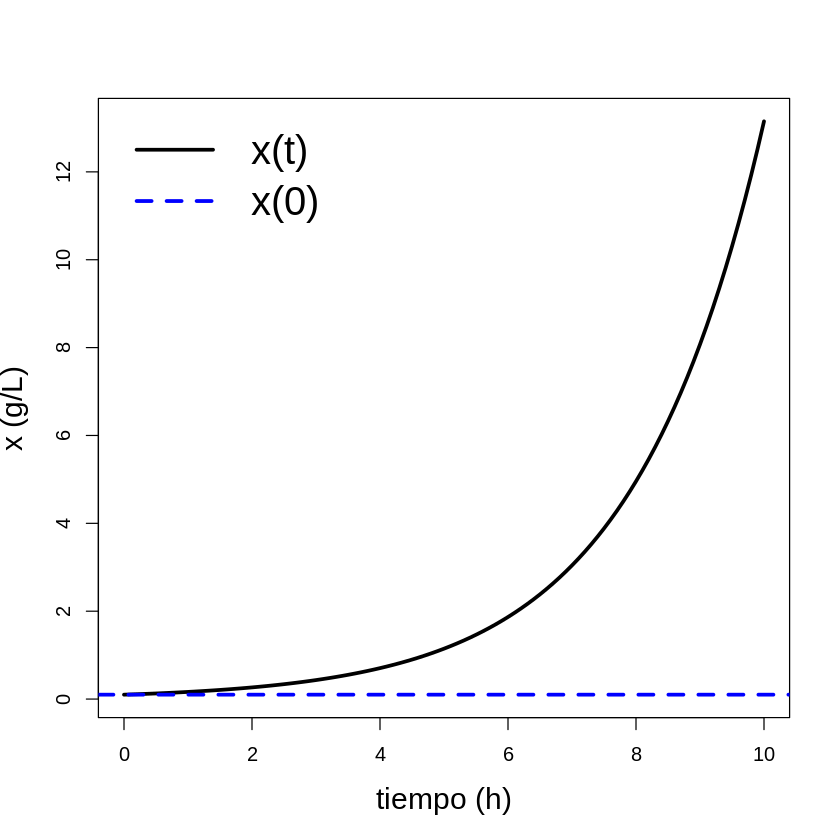

In [11]:
# mostrar resultados 
plot(out[,1], out[,2], xlab = "tiempo (h)", ylab = "x (g/L)", cex.lab = 1.5, type = "l", lwd = 3)
abline(h = x0, lwd = 3, lty = 2, col = "blue")
legend("topleft", legend = c("x(t)", "x(0)"), bty = "n", lty = c(1,2),lwd = 3,, col = c("black", "blue"), cex = 2)

Figur 4. Gráfica de $x(t)$ vs $t$. Se aprecia como la concentración de biomasa, $x(t)$, se aleja de la condición inicial más rápidamente cuando $t \rightarrow \infty$ 

¿Qué ocuriría si el tiempo de simulación fuera de 100 horas? ¿Cuántos microorganismo habría después de 4 días? El modelo (2) tiene limitaciones en cuanto al rango de valores de concentración en el cual describe de forma adecuada el proceso. Si consideramos una población muy grande de microorganismos, es natural pensar que los recursos empezarían a escasear, o se podrían generar productos de su metabolismo que resulten tóxicos. Veamos un ejemplo que considere estos efectos negativos sobre el crecimiento 

# Ejemplo 2: Crecimiento logístico 

## 1. Descripción del proceso 

Consideremos una población de peces que viven alimentandose material orgánico presente en su ambiente. Podemos asumir que este material del que se alimentan permanece aproximadamente constante. Además consideremos que la tasa de muerte del los peces, $d$, es constante. Por otro lado, se tiene que la tasa de nacimiento depende de la cantidad de peces, y obedece la siguiente relación:

$$
b(P) = b(1 - \frac{P}{k_1}) \tag{10}
$$

donde $b$ represente la tasa de nacimiento máxima (1/dias), que se obtiene cuando $P \rightarrow 0$. El parámetro $k_1$ representa la cantidad de peces para la cual la tasa de nacimiento es cero.

In [19]:
birth_rate <- function(P) {
    rate = b*(1 - P/k1)
    return(rate)
} 

In [20]:
# establecer valor de parámetros 
b = 0.5 # 1/dias
k1 = 100 # peces
d = 0.1 # 1/dias

In [21]:
# valores de P a evaluar 
P <- seq(0,120,1)
br <- birth_rate(P)

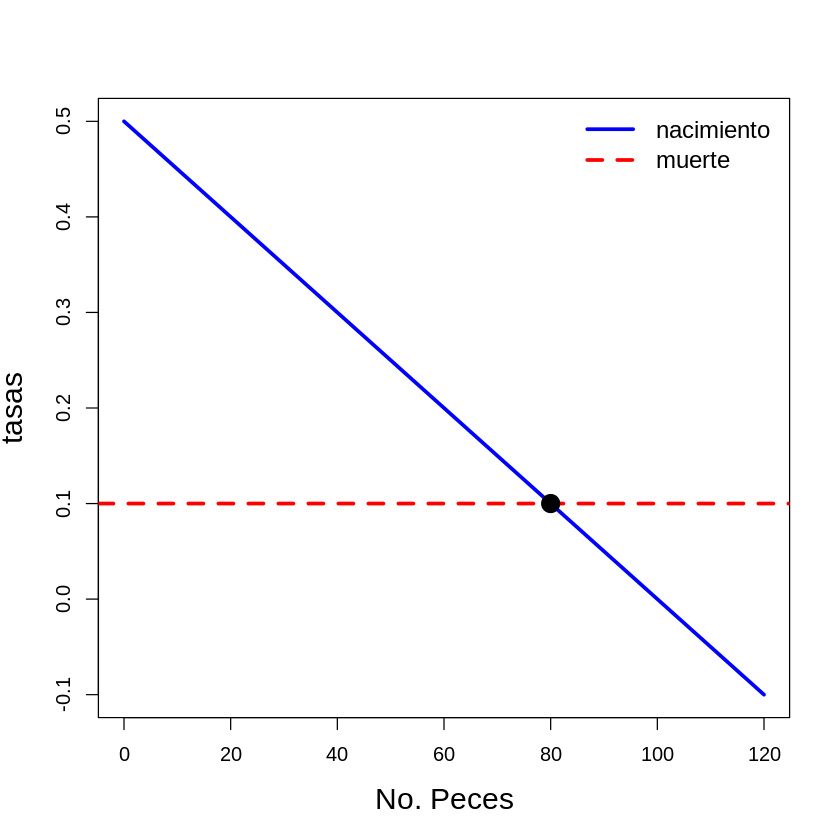

In [39]:
plot(P, br, type = "l", xlab = "No. Peces", ylab = "tasas", lwd = 3, lty = 1, col = "blue", cex.lab = 1.5)
abline(h = d,, lwd = 3, lty = 2, col = "red")
legend("topright", legend = c("nacimiento","muerte"), bty = "n", lwd = 3, lty = c(1,2), cex = 1.2, col = c("blue","red"))
points(80,0.1, pch = 20, cex = 3)

Figura 5. Tasa de nacimiento de de muerte vs No. Peces. Mientras que la tasa de muerte (línea roja punteada) permanece constante, la tasa de nacimiento (línea azul continua) disminuye al aumentar el número de peces. Esta disminución se puede atribuir a una competencia por los recursos, o por agotamiento de los mismos. 

En el presente análisis no consideramos ninguna fuente de peces diferente a su nacimiento, ni tampoco algún consumo de los peces por parte de un depredador. 

## 2. Red para describir el proceso 

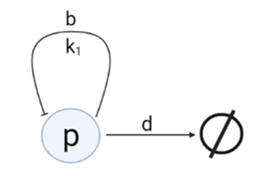

Figura 6. Red del proceso del ejemplo 2. Se observa que en el análisis consideramos solamente una variable, $P$. Existe un efecto positivo de esta variable sobre sí misma debido a los nacimientos. Sin embargo, también está presente un efecto de retroalimentación negativa debido a que cuando hay un gran número de peces, comienza a presentarse un efecto negativo de los peces sobre su crecimiento. Además, se observa la muerte de los peces a una tasa constante

## 3. Establecer modelo

Para plantear el modelo podemos empezar con una balance en el número de peces

$$
\text{cambio en el número de peces} = \text{peces que entran} - \text{peces que salen} + \text{peces que se generan} - \text{peces que mueren}\\
$$

Dado que en el ejemplo solo consideramos el nacimiento y la muerte de los peces se tiene 

$$
\text{cambio en el número de peces} = \text{peces que se generan} - \text{peces que mueren}\\
$$

Lo cual se representa mediante el siguiente modelo 

$$
\frac{dP}{dt} = b\left(1 - \frac{P}{k_1} \right)P - dP \tag{11}
$$

Tanto la tasa de nacimiento máxima, $b$, como la tasa de muerte, $d$, tiene unidades de (1/dias). 

Si desarrollamos (10) y reordenamos se tiene

$$
\frac{dP}{dt} = bP - \frac{bP^2}{k_1} - dP
$$

$$
\frac{dP}{dt} = P\left(b - d - \frac{bP}{k_1}\right)
$$

Haciendo 

$$
r = b-d\hspace{1cm} \text{tasa neta de crecimiento, (1/días)}
$$

$$
K = \frac{(b-d)k_1}{b} \hspace{1cm} \text{capacidad de carga, (peces)}
$$

se llega a

$$
\frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) \tag{12}
$$

La ecuación (12) se conoce como el modelo logístico. Describe el crecimiento de una población donde existe una retroalimentación negativa de la población sobre su crecimiento debido al agotamiento de recursos o a la competencia entre los individuos en la población. En la Fig. 7 se observa una gráfica de esta función.

In [45]:
logistic <- function(P) {
    dPdt = r*P*(1-P/K)
    return(dPdt)
}

In [51]:
# valor de parámetros 
r = 0.5 # (1/day)
K = 100 # (fish)
# valores de p a evaluar 
P = seq(0,110,1)

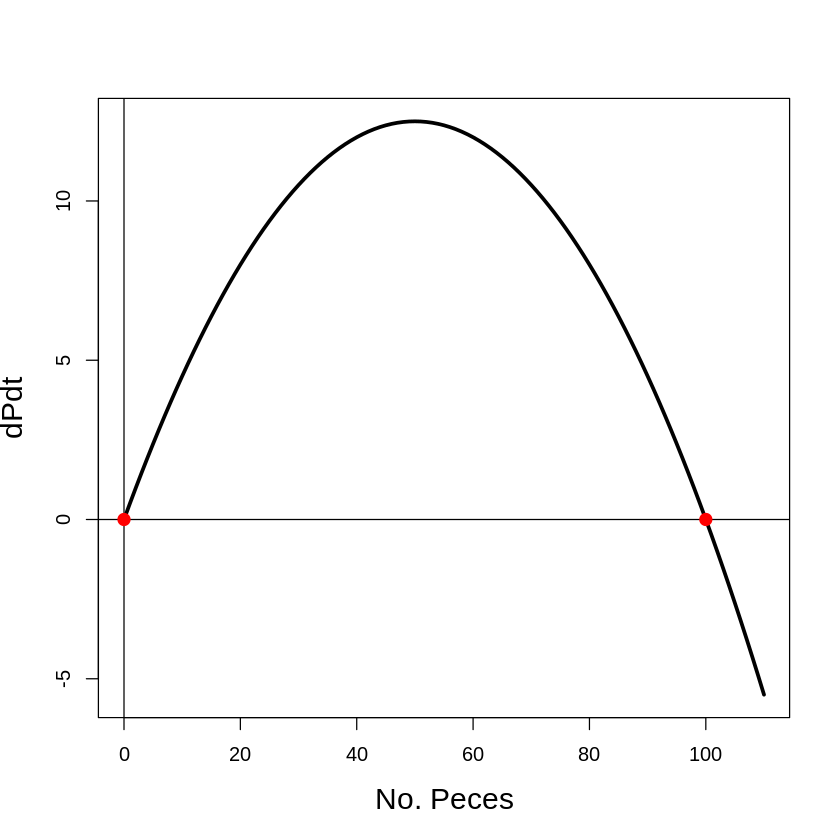

In [52]:
# mostrar cambio en el número de peces 
plot(P, logistic(P), type = "l", lwd = 3, cex.lab = 1.5, xlab = "No. Peces", ylab = "dPdt")
abline(h = 0, v = 0)
points(c(0,K),rep(0,2), pch = 20, cex = 2, col = "red")

Figura 7. Gráfica de $dP/dt$ vs $P$. Se observa como existen dos puntos de equilibrio (puntos rojos). También es importante señalar el hecho de que la gráfica muestra un máximo entre los puntos de equilibrio. Además se observa que para valores de $P$ en el rango $(0, K)$ el cambio en el número de peces es positivo, mientras que para valores en el rango $(K, \infty)$, el cambio en el número de peces es negativo

Tabla 1. Parámetros del modelo del ejemplo 2

| parámetro | valor |
|:---:|:---:|
|r (1/días) | 0.5 |
| K (peces) | 100 |

El valor de los parámetros mostrado en la Tabla 2 han sido escogidos solo para mostrar el ejemplo

## 4. Análisis de estabilidad 

Para determinar los puntos de equlibrio igualamos (12) a cero

$$
\frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) = 0 \rightarrow P_{ss1} = 0, \hspace{0.5cm} P_{ss2} = K
$$

De esta manera se obtiene dos puntos de equilibrio, $P_{ss1} = 0$ y $P_{ss2} = K$. Estos punto de equilibrio se pueden observar en la Fig. 7

La estabilidad de los puntos de equilibrio se puede obserner de dos formas. 

1. Graficar $dP/dt$ vs $P$
Primero, al observar la Fig. 7 se observa que para valores de $P$ en el rango $(0,K)$ el cambio en el número de peces $dP/dt$ siempre es positivo, por lo tanto la población de peces aumenta. Debido a esto podemos establecer que si la población de peces tiene un valor en este rango, la población va a aumentar hasta llegar a un valor $K$. Si por otro lado, la población de peces está en el rango $(K, \infty)$, se tiene que el cambio en el número de peces, $dP/dt$, es negativo, por lo tanto la población de peces disminuye hasta llegar al valor $K$. De esta manera concluimos que el punto de equilibrio $P_{ss1} = 0$ es inestable ya que para valores de $P$ en el rango $(0,K)$ siempre nos alejamos de este punto de equilibrio. Mientras que el punto de equilibrio $P_{ss2} = K$ es estable debido a que para valores de $P$, diferentes de $0$, siempre nos acercamos a este valor.

2. Calculo de eigenvalor 

Para el modelo (12) se tiene que la derivada con respecto de $P$ es 

$$
\frac{df}{dP} = r - \frac{2rP}{K} \tag{13}
$$

Evaluando (13) en $P_{ss1} = 0$ se tiene

$$
\lambda = \frac{df}{dt} \bigg|_{P=0} = r > 0
$$

Por lo tanto, el punto de equilibrio $P_{ss1} = 0$ es inestable

Evaluando (13) en $P_{ss2} = K$ se tiene 

$$
\lambda = \frac{df}{dt}\bigg|_{P = K} = r - \frac{2rK}{K} = -r < 0
$$

De esta manera se tiene que el punto de equilibrio $P_{ss2} = K$ es estable.



## 5. Análisis dinámico 

Ahora realizamos la integración numérica de (12) 

In [53]:
log_growth <- function(time, parms, state) {
    with(as.list(c(parms, state)), {
        dPdt = r*P*(1 - P/K)
        return(list(c(dPdt)))
    })
}

In [59]:
# establecer valor de parámetros 
p <- c(r = r, K = K)
# condiciones iniciales 
P0 <- c(P = 2)
# tiempo de integración 
time <- seq(0,20,0.1) # días

In [60]:
# resolver ODE
out <- ode(func = log_growth, y = P0, times = time, parms = p, method = "rk4")

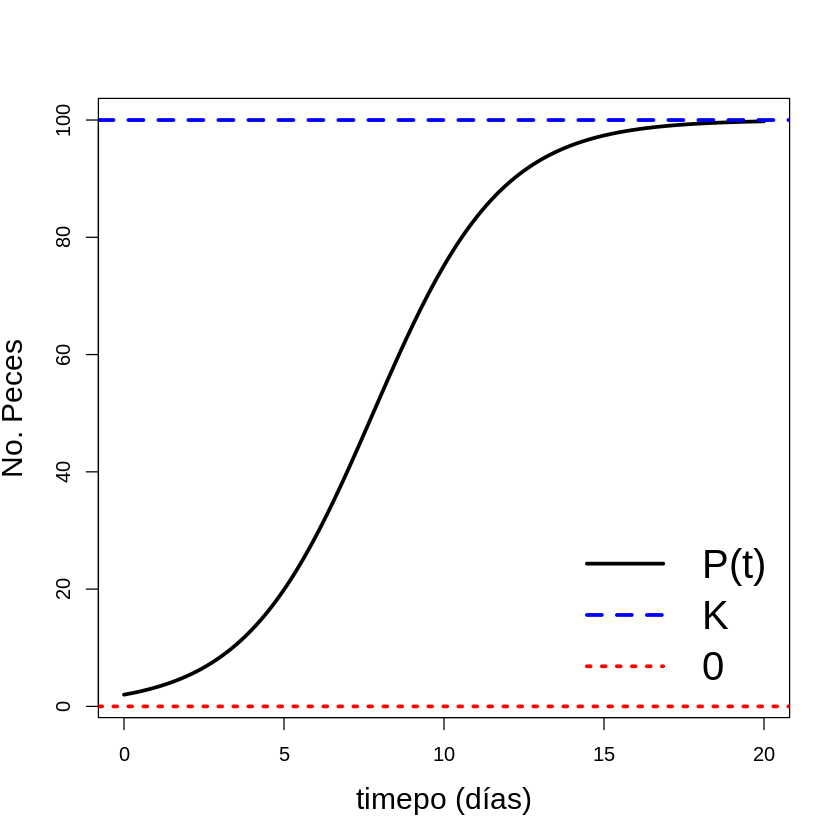

In [65]:
# mostrar resultados de simulación 
plot(out[,1], out[,2], type = "l", lwd = 3, cex.lab = 1.5, xlab = "timepo (días)", ylab = "No. Peces")
abline(h = K, lwd = 3, lty = 2, col = "blue")
abline(h = 0, lwd = 3, lty = 3, col = "red")
legend("bottomright", legend = c("P(t)", "K", "0"), bty = "n", lty = c(1,2,3),lwd = 3,, col = c("black", "blue", "red"), cex = 2)

Figura 8. Comportamiento dinámico de (12). Observa como al avanzar el tiempo la población de peces se aleja de $0$ y tiene hacia $K$